In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
path = "../data/Influence_network/friends.csv"
df_nat = pd.read_csv(path)

In [3]:
df = df_nat.iloc[:10000,:]
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   2007-12-15 12:33:33;100002;99803  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


((10000, 1), None)

In [4]:
vals = []
for i,row in df.iterrows():
    vals.append(row[df.columns[0]].split(";"))
vals[:4]

[['2007-12-15 12:33:33', '100006', '99186'],
 ['2007-12-15 12:33:33', '100017', '99480'],
 ['2007-12-15 12:33:33', '100024', '100760'],
 ['2007-12-15 12:33:33', '100024', '100871']]

In [5]:
data = []
for x in vals:
    data.append({"date":x[0], "source":int(x[1]), "target":int(x[2])})

df1 = pd.DataFrame(data)
df1.head()

,date,source,target
0,2007-12-15 12:33:33,100006,99186
1,2007-12-15 12:33:33,100017,99480
2,2007-12-15 12:33:33,100024,100760
3,2007-12-15 12:33:33,100024,100871
4,2007-12-15 12:33:33,100024,38991


In [6]:
df1["date"].value_counts()

date
2007-12-15 12:33:33    10000
Name: count, dtype: int64

In [7]:
nodes = set(df1["source"].values).union(set(df1["target"].values))
len(nodes)

4119

In [8]:
2*10000/len(nodes)

4.855547462976451

In [10]:
df1.drop(columns="date", inplace=True)
df1.head()

,source,target
0,100006,99186
1,100017,99480
2,100024,100760
3,100024,100871
4,100024,38991


In [10]:
edges = []
for i,row in df1.iterrows():
    edges.append((int(row["source"]), int(row["target"])))
edges[:4]

[(100006, 99186), (100017, 99480), (100024, 100760), (100024, 100871)]

In [12]:
G = nx.from_edgelist(edges)
G.number_of_nodes(), G.number_of_edges(), nx.is_connected(G), nx.number_connected_components(G)

(4119, 9906, False, 56)

In [13]:
str_edges = [f"{x[0]} {x[1]}" for x in edges]
str_edges[:4]

['100006 99186', '100017 99480', '100024 100760', '100024 100871']

In [14]:
path = "../data/networks/influence_nw.txt"
with open(path,"w") as f:
    f.write("\n".join(str_edges))

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
p_val = [0, 0.005, 0.01,0.1,0.5,1]
for p in p_val:
    G = nx.watts_strogatz_graph(1000, 4, p)
    print(f"For p={p}: {nx.transitivity(G)}")

For p=0: 0.5
For p=0.005: 0.48993846665557955
For p=0.01: 0.4824721714570527
For p=0.1: 0.37086843810758263
For p=0.5: 0.0610079575596817
For p=1: 0.004690164866401364


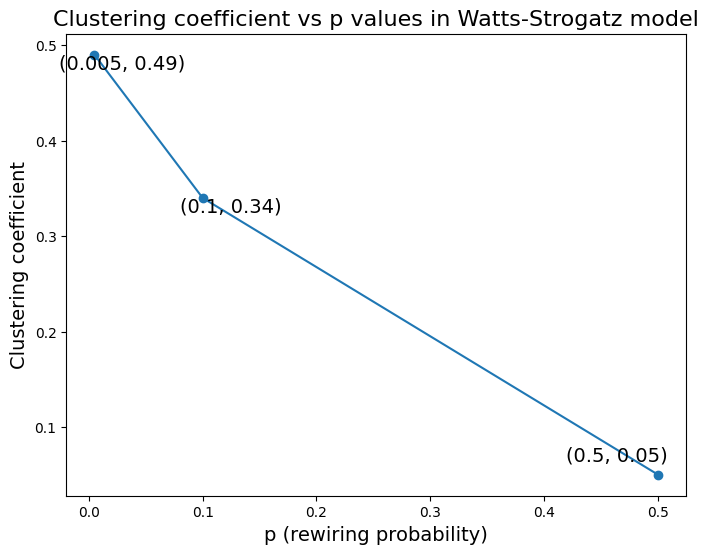

In [13]:
x = [0.005, 0.1, 0.5]
y = [0.49, 0.34, 0.05]

# plt.style.use("ggplot")
plt.figure(figsize=(8,6))
plt.plot(x, y, marker="o")
plt.xlabel("p (rewiring probability)", fontsize=14)
plt.ylabel("Clustering coefficient", fontsize=14)
plt.title("Clustering coefficient vs p values in Watts-Strogatz model", fontsize=16)

# Label the points beside the point and not on the line
for i, txt in enumerate(y):
    offset = (20, -10) if txt > 0.1 else (-30, 10)
    plt.annotate(f"({x[i]}, {txt})", (x[i], y[i]), textcoords="offset points", xytext=offset, ha='center', fontsize=14)

plt.savefig("../images/cc_vs_p.png")